In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':14})
import json as js
import os

In [2]:
path = 'benchmark_results/'

files = os.listdir(path)
try: files.remove('.ipynb_checkpoints')
except: pass
files.sort()

sizes = [10**i for i in range(3,6)]
t_np, t_jax, t_jaxgpu = [[] for _ in range(3)]
for file in files:
        
        with open(path+file) as f:
            data = js.load(f)
        
        backend = file.split('_')[0]
        size = file.split('_')[1].split('.')[0]
        time = data['benchmarks'][f'veris_dyn_{size}_benchmark.py'][0]['per_iteration']['mean'],
        
        if backend=='numpy': t_np += time,
        if backend=='jax': t_jax += time,
        if backend=='jax-gpu': t_jaxgpu += time,

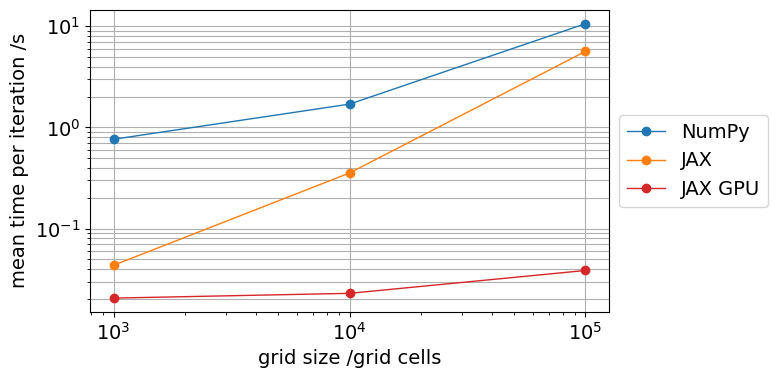

In [3]:
fig, ax = plt.subplots(1,1, figsize=(8,4))

for data, label, color in zip(
    [t_np, t_jax, t_jaxgpu],
    ['NumPy', 'JAX', 'JAX GPU'],
    ['C0', 'C1', 'C3']
):
    ax.plot(sizes, data, marker='o', linewidth=1, label=label, color=color)

ax.set_xlabel('grid size /grid cells')
ax.set_ylabel('mean time per iteration /s')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc='center left', bbox_to_anchor=(1,0.5))
ax.grid(which='both', axis='y')
ax.grid(which='major', axis='x')

fig.tight_layout()